<a href="https://colab.research.google.com/github/NaithaniAR/Bank-Marketing-Effectiveness-Prediction/blob/main/Bank_Marketing_Effectiveness_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the effectiveness of bank marketing campaigns </u></b>

## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

Mounting Drive


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import linear algebra and data manipulation libraries
import numpy as np
import pandas as pd

#import standard visualization
import matplotlib.pyplot as plt
import seaborn as sns

#import machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import xgboost

from sklearn.model_selection import train_test_split #split
from sklearn.metrics import accuracy_score #metrics

#tools for hyperparameters search
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import os
#print(os.listdir("../input"))



from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

Importing Datasets 

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/bank-full.csv',sep=';')

#To suppres scientific notation.
pd.options.display.float_format = '{:.2f}'.format 

pd.set_option('display.max_columns', None)

# Marketing
Marketing is the process of exploring, creating, and delivering value to meet the needs of a target market in terms of goods and services; potentially including selection of a target audience; selection of certain attributes or themes to emphasize in advertising; operation of advertising campaigns; attendance at trade shows and public events; design of products and packaging attractive to buyers; defining the terms of sale, such as price, discounts, warranty, and return policy; product placement in media or with people believed to influence the buying habits of others; agreements with retailers, wholesale distributors, or resellers; and attempts to create awareness of, loyalty to, and positive feelings about a brand

## Data Exploration

In [4]:
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
# Catagorical columns 

categorical_features  = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

# Numerical columns

numerical_features  = ['age','balance', 'day','duration', 'campaign', 'pdays', 'previous']


In [7]:
# Pearson correlation coefficient

df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.00,0.10,-0.01,-0.00,0.00,-0.02,0.00
balance,0.10,1.00,0.00,0.02,-0.01,0.00,0.02
day,-0.01,0.00,1.00,-0.03,0.16,-0.09,-0.05
duration,-0.00,0.02,-0.03,1.00,-0.08,-0.00,0.00
campaign,0.00,-0.01,0.16,-0.08,1.00,-0.09,-0.03
pdays,-0.02,0.00,-0.09,-0.00,-0.09,1.00,0.45
previous,0.00,0.02,-0.05,0.00,-0.03,0.45,1.00


## Checking for null values 

In [8]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

# Exploratory data analysis 


## Data Visualization
Data visualization is the graphical representation of information and data. By using visual elements like charts, graphs, and maps, data visualization tools provide an accessible way to see and understand trends, outliers, and patterns in data.

Categorical columns 


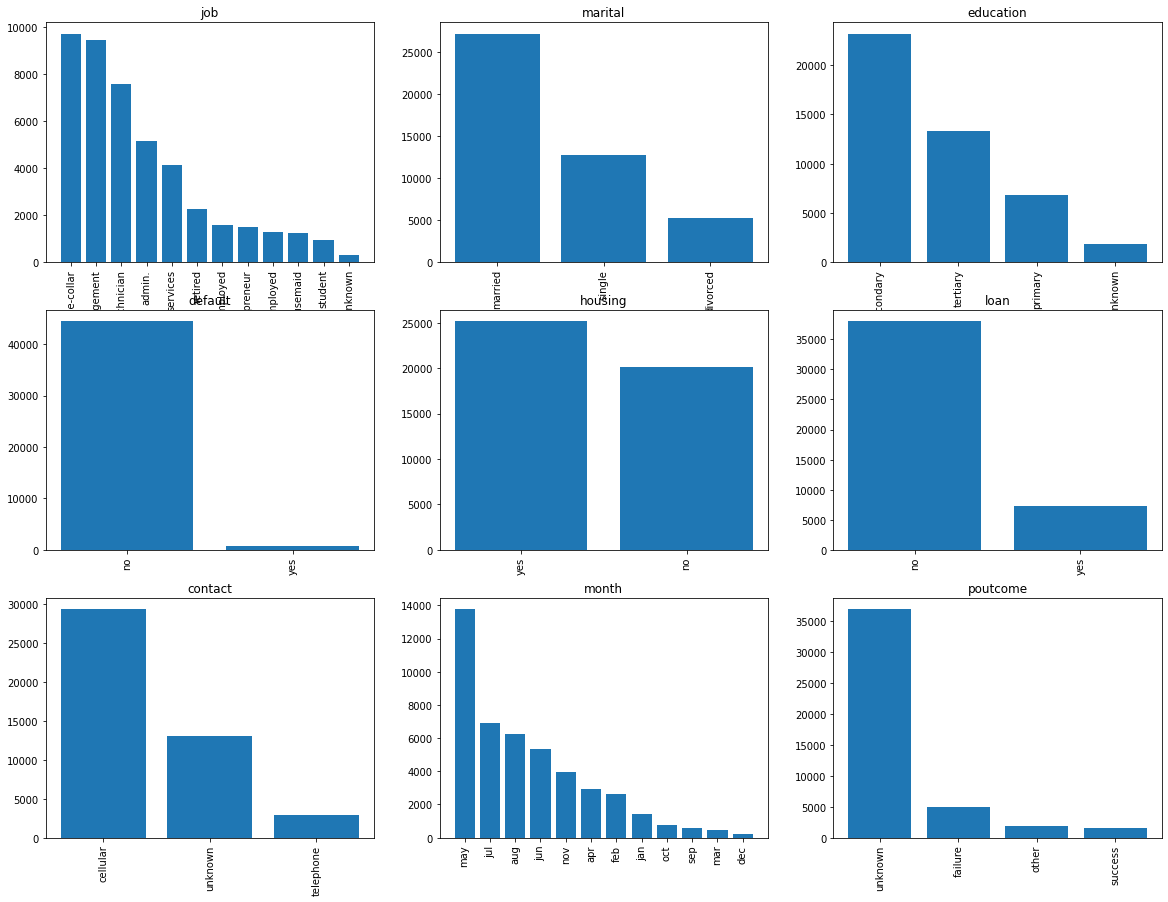

In [10]:
#Categorical columns exploration

categorical_features  = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for categorical_feature  in categorical_features:
    value_counts = df[categorical_feature ].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(categorical_feature )
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

Numerical columns 


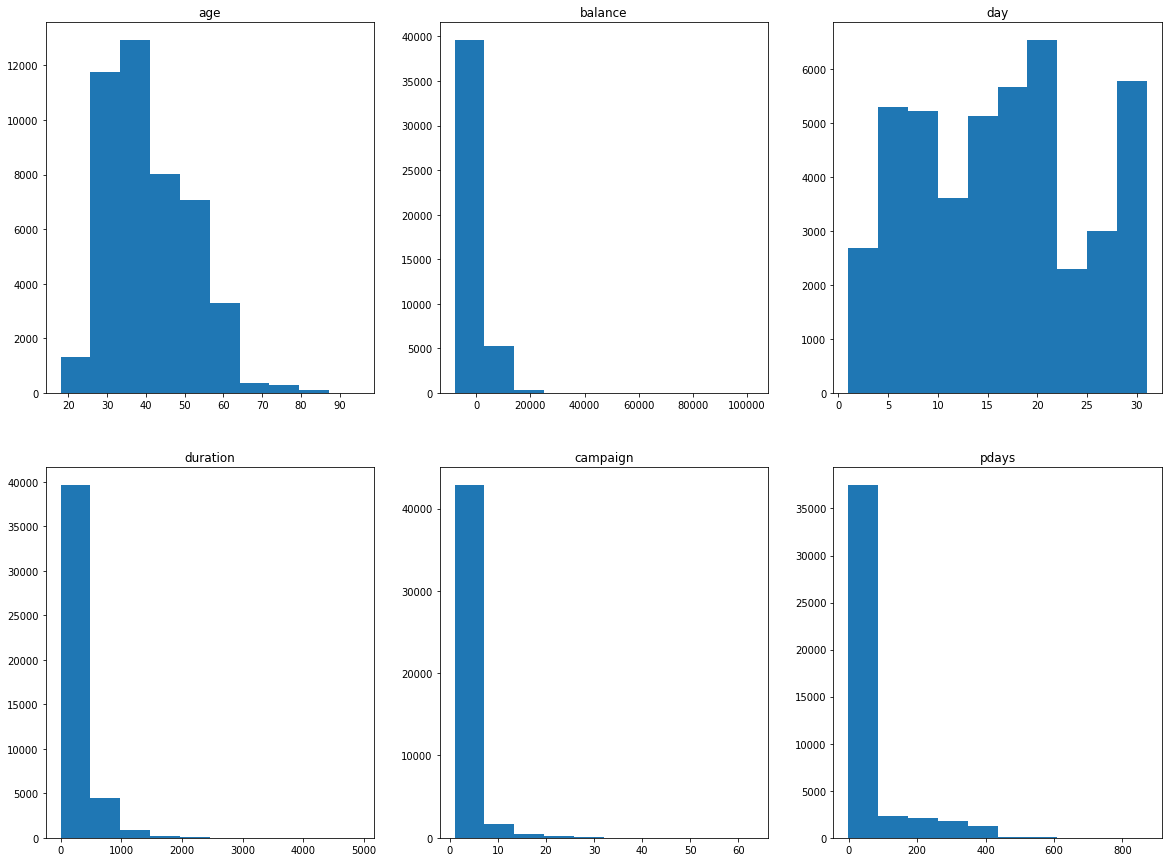

In [11]:
#Numerical columns Visualization




fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for numerical_feature in numerical_features:
    
    trace_x = counter // 3
    trace_y = counter % 3
    try:
     axs[trace_x, trace_y].hist(df[numerical_feature])
    
     axs[trace_x, trace_y].set_title(numerical_feature)
    except Exception:
     pass   
    
    counter += 1

plt.show()

# Numerical columns

num_columns = ['age','balance', 'day','duration', 'campaign', 'pdays', 'previous']

We can see that numerical columns have outliers (especially 'pdays', 'campaign' and 'previous' columns).We should look closer at the data.



In [12]:
df[num_columns].describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00
mean,40.94,1362.27,15.81,258.16,2.76,40.20,0.58
std,10.62,3044.77,8.32,257.53,3.10,100.13,2.30
min,18.00,-8019.00,1.00,0.00,1.00,-1.00,0.00
25%,33.00,72.00,8.00,103.00,1.00,-1.00,0.00
50%,39.00,448.00,16.00,180.00,2.00,-1.00,0.00
75%,48.00,1428.00,21.00,319.00,3.00,-1.00,0.00
max,95.00,102127.00,31.00,4918.00,63.00,871.00,275.00


 pdays shows number of days that passed  after the client was last contacted from a previous campaign. in this variable values range from -1 to 871. Assuming -1 means that the customer was contacted and no days has lapsed since last contact.Since the entry in data has info of existing clients it makes sense that the client was definitely contacted atleast once, will further verify this theory 

In [13]:

df.loc[(df['pdays']==-1) & (df['y']=='yes')].describe()

,age,balance,day,duration,campaign,pdays,previous
count,3384.00,3384.00,3384.00,3384.00,3384.00,3384.00,3384.00
mean,41.22,1701.31,15.40,610.50,2.34,-1.00,0.00
std,13.24,3115.38,8.53,423.18,2.21,0.00,0.00
min,18.00,-3058.00,1.00,8.00,1.00,-1.00,0.00
25%,31.00,172.75,8.00,276.00,1.00,-1.00,0.00
50%,38.00,674.00,15.00,529.00,2.00,-1.00,0.00
75%,50.00,2016.50,21.00,835.00,3.00,-1.00,0.00
max,95.00,52587.00,31.00,3881.00,32.00,-1.00,0.00


In [14]:
df.loc[(df['pdays']==-1) & (df['y']=='no')].describe()

,age,balance,day,duration,campaign,pdays,previous
count,33570.00,33570.00,33570.00,33570.00,33570.00,33570.00,33570.00
mean,40.90,1280.23,16.22,222.17,2.98,-1.00,0.00
std,10.10,3029.18,8.35,209.42,3.41,0.00,0.00
min,18.00,-8019.00,1.00,0.00,1.00,-1.00,0.00
25%,33.00,48.00,9.00,95.00,1.00,-1.00,0.00
50%,39.00,393.00,17.00,164.00,2.00,-1.00,0.00
75%,48.00,1306.00,22.00,281.00,3.00,-1.00,0.00
max,95.00,102127.00,31.00,4918.00,63.00,-1.00,0.00


Since accounts exist  which subscribed and have pdays as -1,all the observatios with pday -1 has zero previous which tilts slightly in our assumption.

What is the distribution of job categories 

# Bivariate Analysis

Q. What is the distribution of people joining and not joining the term deposite ?

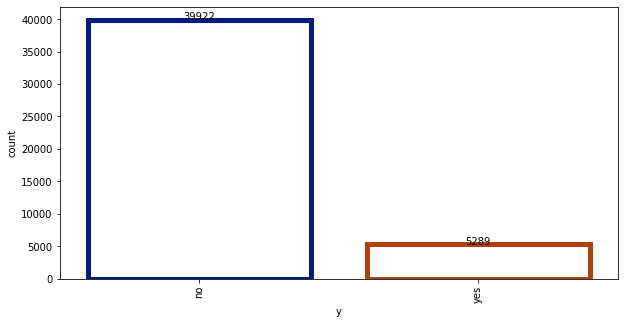

In [15]:
fig, ax1 = plt.subplots(figsize=(10,5))
graph = sns.countplot(x="y", data=df,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
        df['y'].value_counts()[i],ha="center")
    i += 1

Q. Run a visual analysis on all categorical variables and split it wrt. acceptance to term deposit.

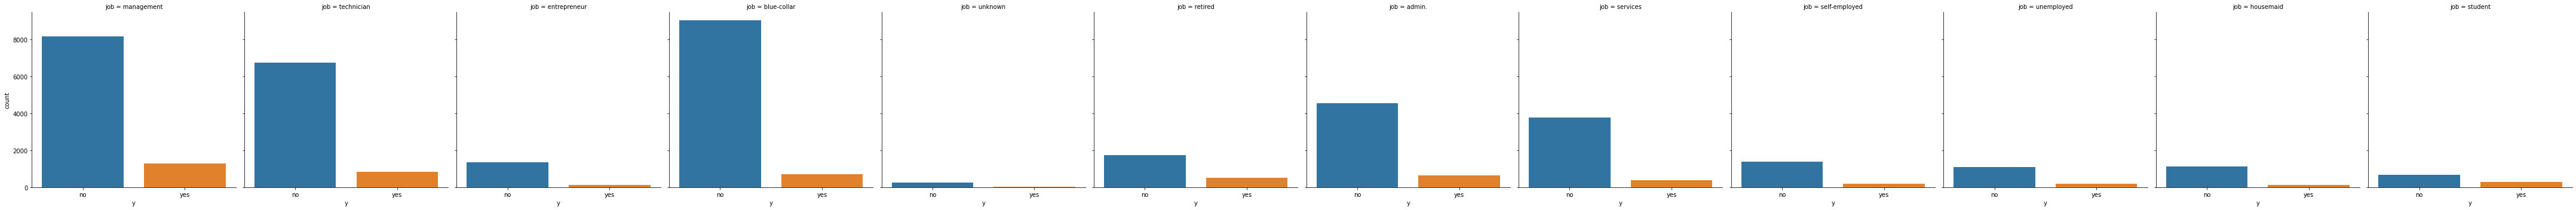

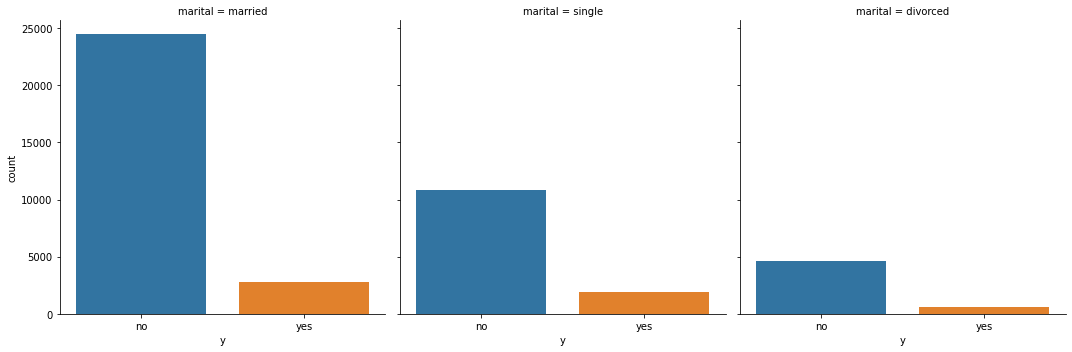

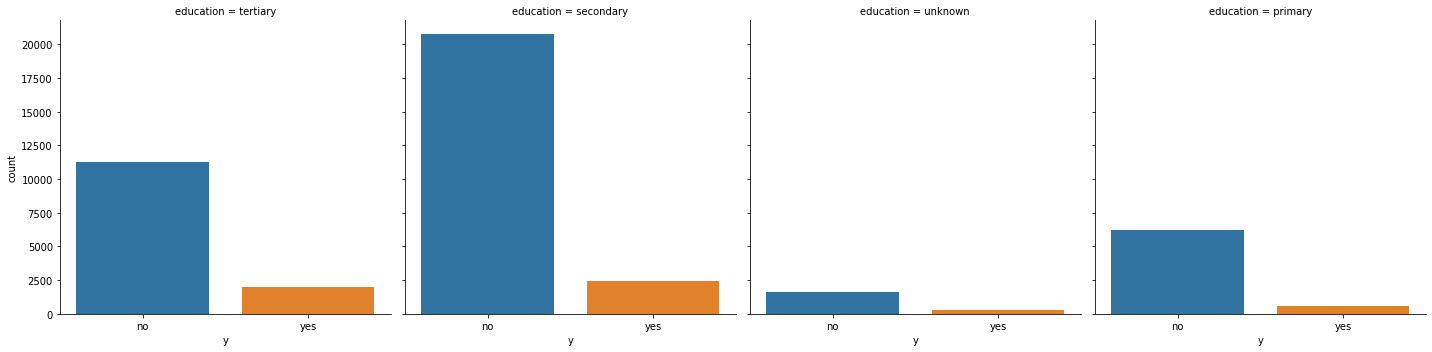

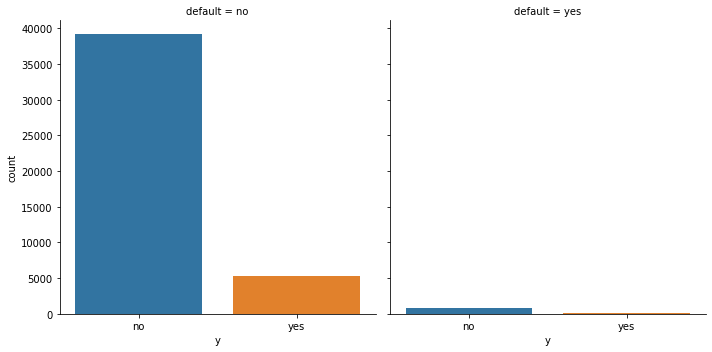

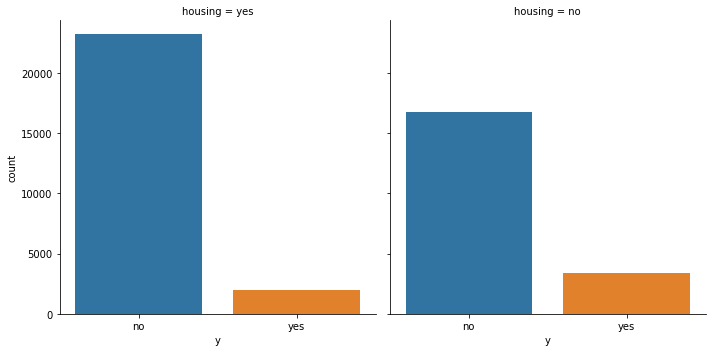

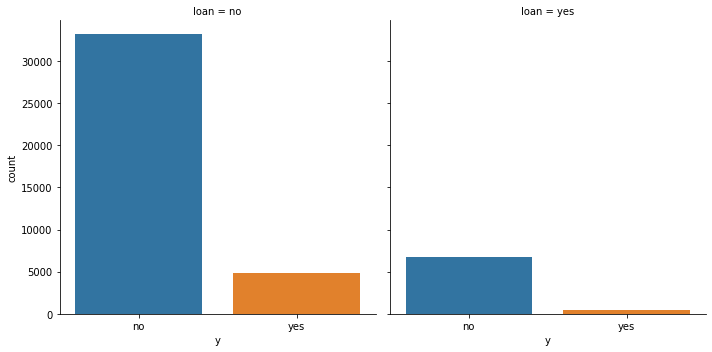

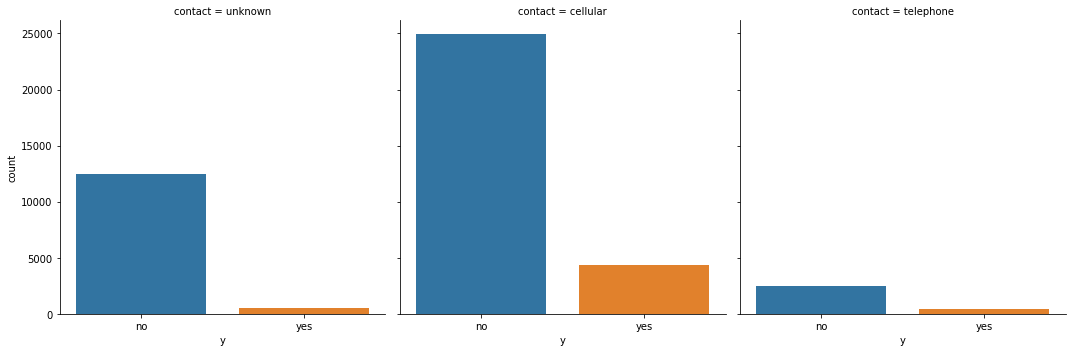

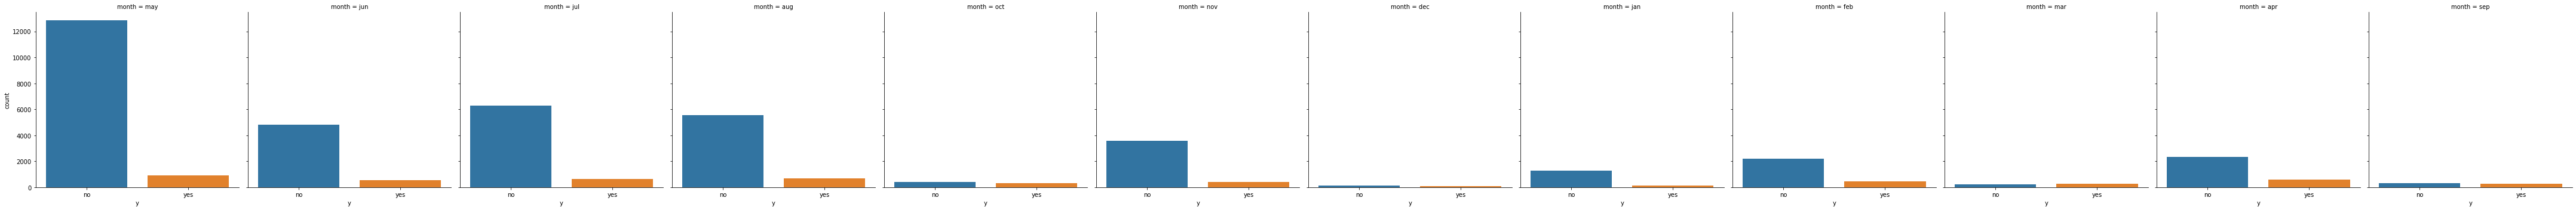

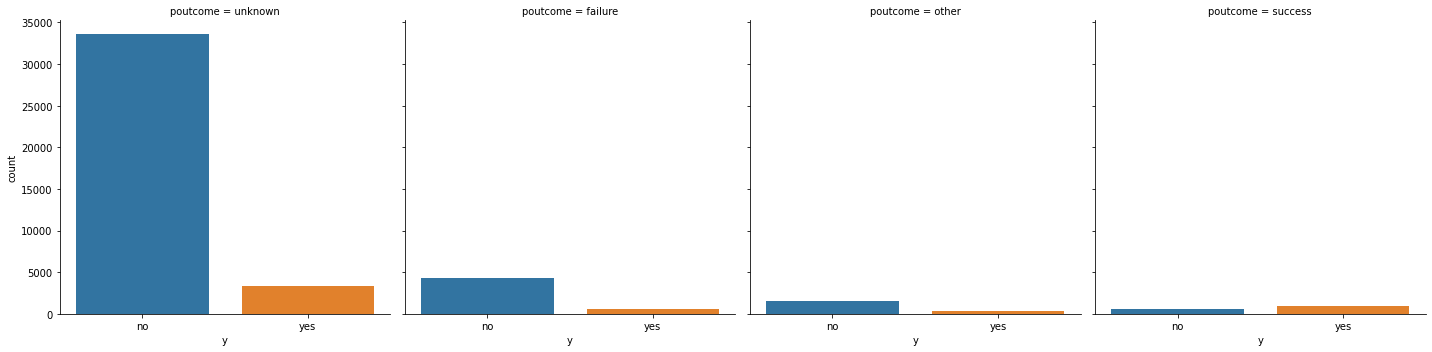

In [16]:
#check target label split over categorical features
#Find out the relationship between categorical variable and dependent variable

for categorical_feature in categorical_features:
    sns.catplot(x='y', col=categorical_feature, kind='count', data= df)

plt.show()

Q. Explore the impact of Eduation recived by the clients on the success of the campaign


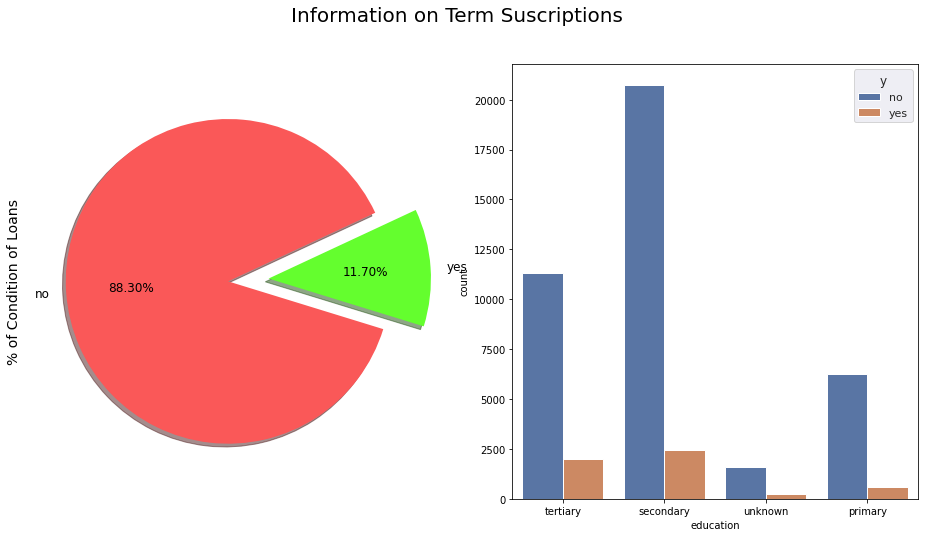

In [17]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#FA5858", "#64FE2E"]
labels ="no", "yes"

plt.suptitle('Information on Term Suscriptions', fontsize=20)

df["y"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors,  labels=labels, fontsize=12, startangle=25)


# ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

# sns.countplot('loan_condition', data=df, ax=ax[1], palette=colors)
# ax[1].set_title('Condition of Loans', fontsize=20)
# ax[1].set_xticklabels(['Good', 'Bad'], rotation='horizontal')
palette = [ "#FA5858","#64FE2E"]

sns.set_theme(style="darkgrid")

ax[1] = sns.countplot(x="education",  hue="y",data=df)

In [18]:
#number of contacts performed during previous campaign ('previous') and deposit
p_df = pd.DataFrame()
p_df['previous_yes'] = (df[df['y'] == 'yes'][['y','previous']].describe())['previous']
p_df['previous_no'] = (df[df['y'] == 'no'][['y','previous']].describe())['previous']

p_df

,previous_yes,previous_no
count,5289.00,39922.00
mean,1.17,0.50
std,2.55,2.26
min,0.00,0.00
25%,0.00,0.00
50%,0.00,0.00
75%,1.00,0.00
max,58.00,275.00


In [19]:

#default features does not play imp role
df.groupby(['y','default']).size()

y    default
no   no         39159
     yes          763
yes  no          5237
     yes           52
dtype: int64

#Feature engineering 


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [21]:
# Defining categories 

categorical_features  = ['job', 'marital', 'education', 'contact', 'month','poutcome']

#Creating summies
df_m=pd.get_dummies(df, columns = categorical_features,drop_first=True)

#label encoding 
boolean_columns = ['housing', 'loan', 'y', 'default']
for col in  boolean_columns:
    df_m[col+'_new']=df_m[col].apply(lambda x : 1 if x == 'yes' else 0)
    df_m.drop(col, axis=1, inplace=True)

In [22]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   balance              45211 non-null  int64
 2   day                  45211 non-null  int64
 3   duration             45211 non-null  int64
 4   campaign             45211 non-null  int64
 5   pdays                45211 non-null  int64
 6   previous             45211 non-null  int64
 7   job_blue-collar      45211 non-null  uint8
 8   job_entrepreneur     45211 non-null  uint8
 9   job_housemaid        45211 non-null  uint8
 10  job_management       45211 non-null  uint8
 11  job_retired          45211 non-null  uint8
 12  job_self-employed    45211 non-null  uint8
 13  job_services         45211 non-null  uint8
 14  job_student          45211 non-null  uint8
 15  job_technician       45211 non-null  uint8
 16  job_unemployed       4

Train test split

In [ ]:
df

In [23]:
X = df_m.drop(['y_new'],axis=1)
y = df_m['y_new']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=34)
print(X_train.shape)
print(X_test.shape)

(36168, 42)
(9043, 42)


# Oversampling using SMOTE

In [24]:
import imblearn
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 0)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [25]:
print ('original dataset length',len(X))
print ('Resample dataset length',len(X_train_sm))

original dataset length 45211
Resample dataset length 63802


Scaling on Data set

In [26]:
# Transforming data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_sm = scaler.fit_transform(X_train_sm)
X_test = scaler.transform(X_test)

# Machine learning models 

**Model building** 


We will start by building simple prediction models and work our way upto more complex models. but first lets start by defining some important function's.

In [45]:
def fit_mod(model, X_train, X_test, y_train, y_test):

  '''Takes Classifier model and train test splits as input and prints the
  evaluation matrices with the plot and returns the model'''
  global Y_pred
  # Fitting the model
  model.fit(X_train,y_train)
  Y_pred = model.predict(X_test)
  a,p = y_test,Y_pred 

  return Y_pred

## LogisticRegression

In [27]:

logreg = LogisticRegression()

logreg.fit(X_train_sm, y_train_sm)

logreg_prediction = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train_sm, y_train_sm))
print("Testing accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_test))

Training accuracy Score    :  0.9293752546942102
Testing accuracy Score :  0.8870949906004645
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      8166
           1       0.43      0.50      0.46       877

    accuracy                           0.89      9043
   macro avg       0.69      0.71      0.70      9043
weighted avg       0.90      0.89      0.89      9043



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


ROC AOC Curve for Logistic Regression

In [28]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import auc

In [29]:
logreg_clf_probability = logreg.predict_proba(X_test)[:,1]

In [30]:
roc_socre=roc_auc_score(y_test, logreg_clf_probability)
roc_socre

0.8601487875149649

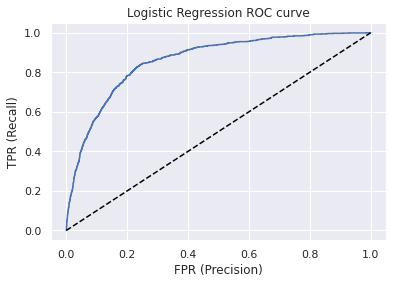

In [31]:
from sklearn.metrics import roc_curve
lg_fpr, lg_tpr, _ = roc_curve(y_test, logreg_clf_probability)

plt.title('Logistic Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(lg_fpr,lg_tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

## Decision Tree Classifier

In [40]:
from sklearn.tree import DecisionTreeClassifier

modeldt = DecisionTreeClassifier()

modeldt.fit(X_train_sm, y_train_sm)
modelprediction = modeldt.predict(X_test)
model_accuracy = accuracy_score(y_test, modelprediction)


print("Training accuracy Score    : ",modeldt.score(X_train_sm, y_train_sm))
print("Testing accuracy Score : ",model_accuracy )
print(classification_report(modelprediction,y_test))

Training accuracy Score    :  1.0
Testing accuracy Score :  0.8651996019020237
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      7830
           1       0.50      0.42      0.45      1213

    accuracy                           0.87      9043
   macro avg       0.70      0.68      0.69      9043
weighted avg       0.86      0.87      0.86      9043



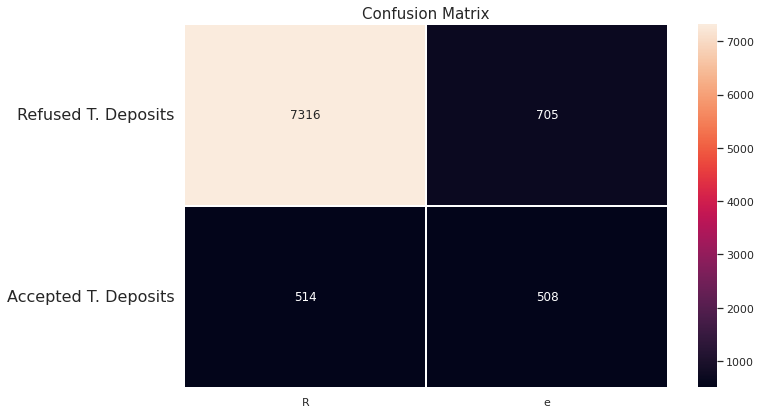

In [41]:
#confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, modelprediction)
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=15)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("Refused T. Deposits', 'Accepted T. Deposits")
ax.set_yticklabels(['Refused T. Deposits', 'Accepted T. Deposits'], fontsize=16, rotation=360)
plt.show()

ROC AOC Curve for Decision Tree Classifier

In [42]:
modeldt_probability = modeldt.predict_proba(X_test)[:,1]

In [43]:
roc_socre=roc_auc_score(y_test, modeldt_probability)
roc_socre

0.7045851508674271

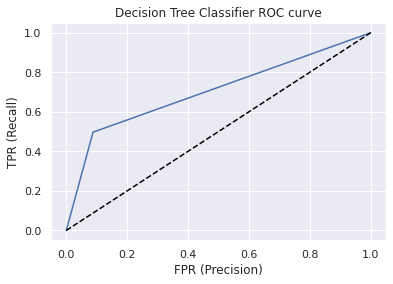

In [44]:
from sklearn.metrics import roc_curve
dt_fpr, dt_tpr, _ = roc_curve(y_test, modeldt_probability)

plt.title('Decision Tree Classifier ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(dt_fpr,dt_tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

# Random Forest Classifier


In [32]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train_sm, y_train_sm)

rf_prediction = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test,rf_prediction)

print("Training accuracy Score    : ",rf_clf.score(X_train_sm, y_train_sm))
print("Testing accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,y_test))

Training accuracy Score    :  1.0
Testing accuracy Score :  0.9044564856795311
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      8205
           1       0.49      0.59      0.54       838

    accuracy                           0.90      9043
   macro avg       0.72      0.77      0.74      9043
weighted avg       0.91      0.90      0.91      9043



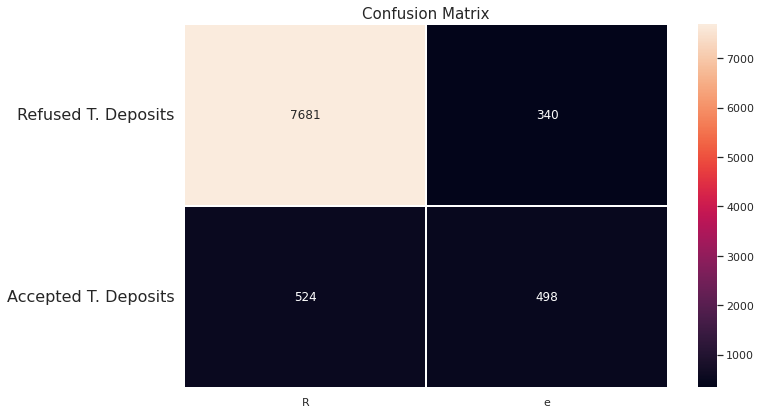

In [33]:
#confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test,rf_prediction)
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=15)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("Refused T. Deposits', 'Accepted T. Deposits")
ax.set_yticklabels(['Refused T. Deposits', 'Accepted T. Deposits'], fontsize=16, rotation=360)
plt.show()

ROC AOC Curve for Random Forest Classifier

In [34]:
rf_clf_probability = rf_clf.predict_proba(X_test)[:,1]

In [35]:
roc_socre=roc_auc_score(y_test, rf_clf_probability)
roc_socre

0.9159114735756019

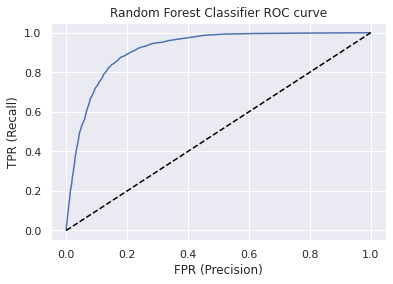

In [36]:
from sklearn.metrics import roc_curve
rfc_fpr, rfc_tpr, _ = roc_curve(y_test, rf_clf_probability)

plt.title('Random Forest Classifier ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(rfc_fpr,rfc_tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

In [37]:
rf_clf.feature_importances_

array([0.03646487, 0.04477914, 0.04168401, 0.24934364, 0.02474256,
       0.02813722, 0.01216812, 0.02813026, 0.00359303, 0.0043818 ,
       0.01495646, 0.00460139, 0.00374363, 0.00862638, 0.00226201,
       0.01579836, 0.00399287, 0.00070911, 0.03798422, 0.01946503,
       0.02604954, 0.01647244, 0.0050559 , 0.00659186, 0.05715138,
       0.03211235, 0.00119154, 0.01238816, 0.01007023, 0.03079965,
       0.01609356, 0.00205074, 0.04354568, 0.02075837, 0.00316398,
       0.00221474, 0.00583317, 0.00839015, 0.01543574, 0.07612698,
       0.02209821, 0.00084152])

In [38]:
features = X.columns
importances = rf_clf.feature_importances_
indices = np.argsort(importances)

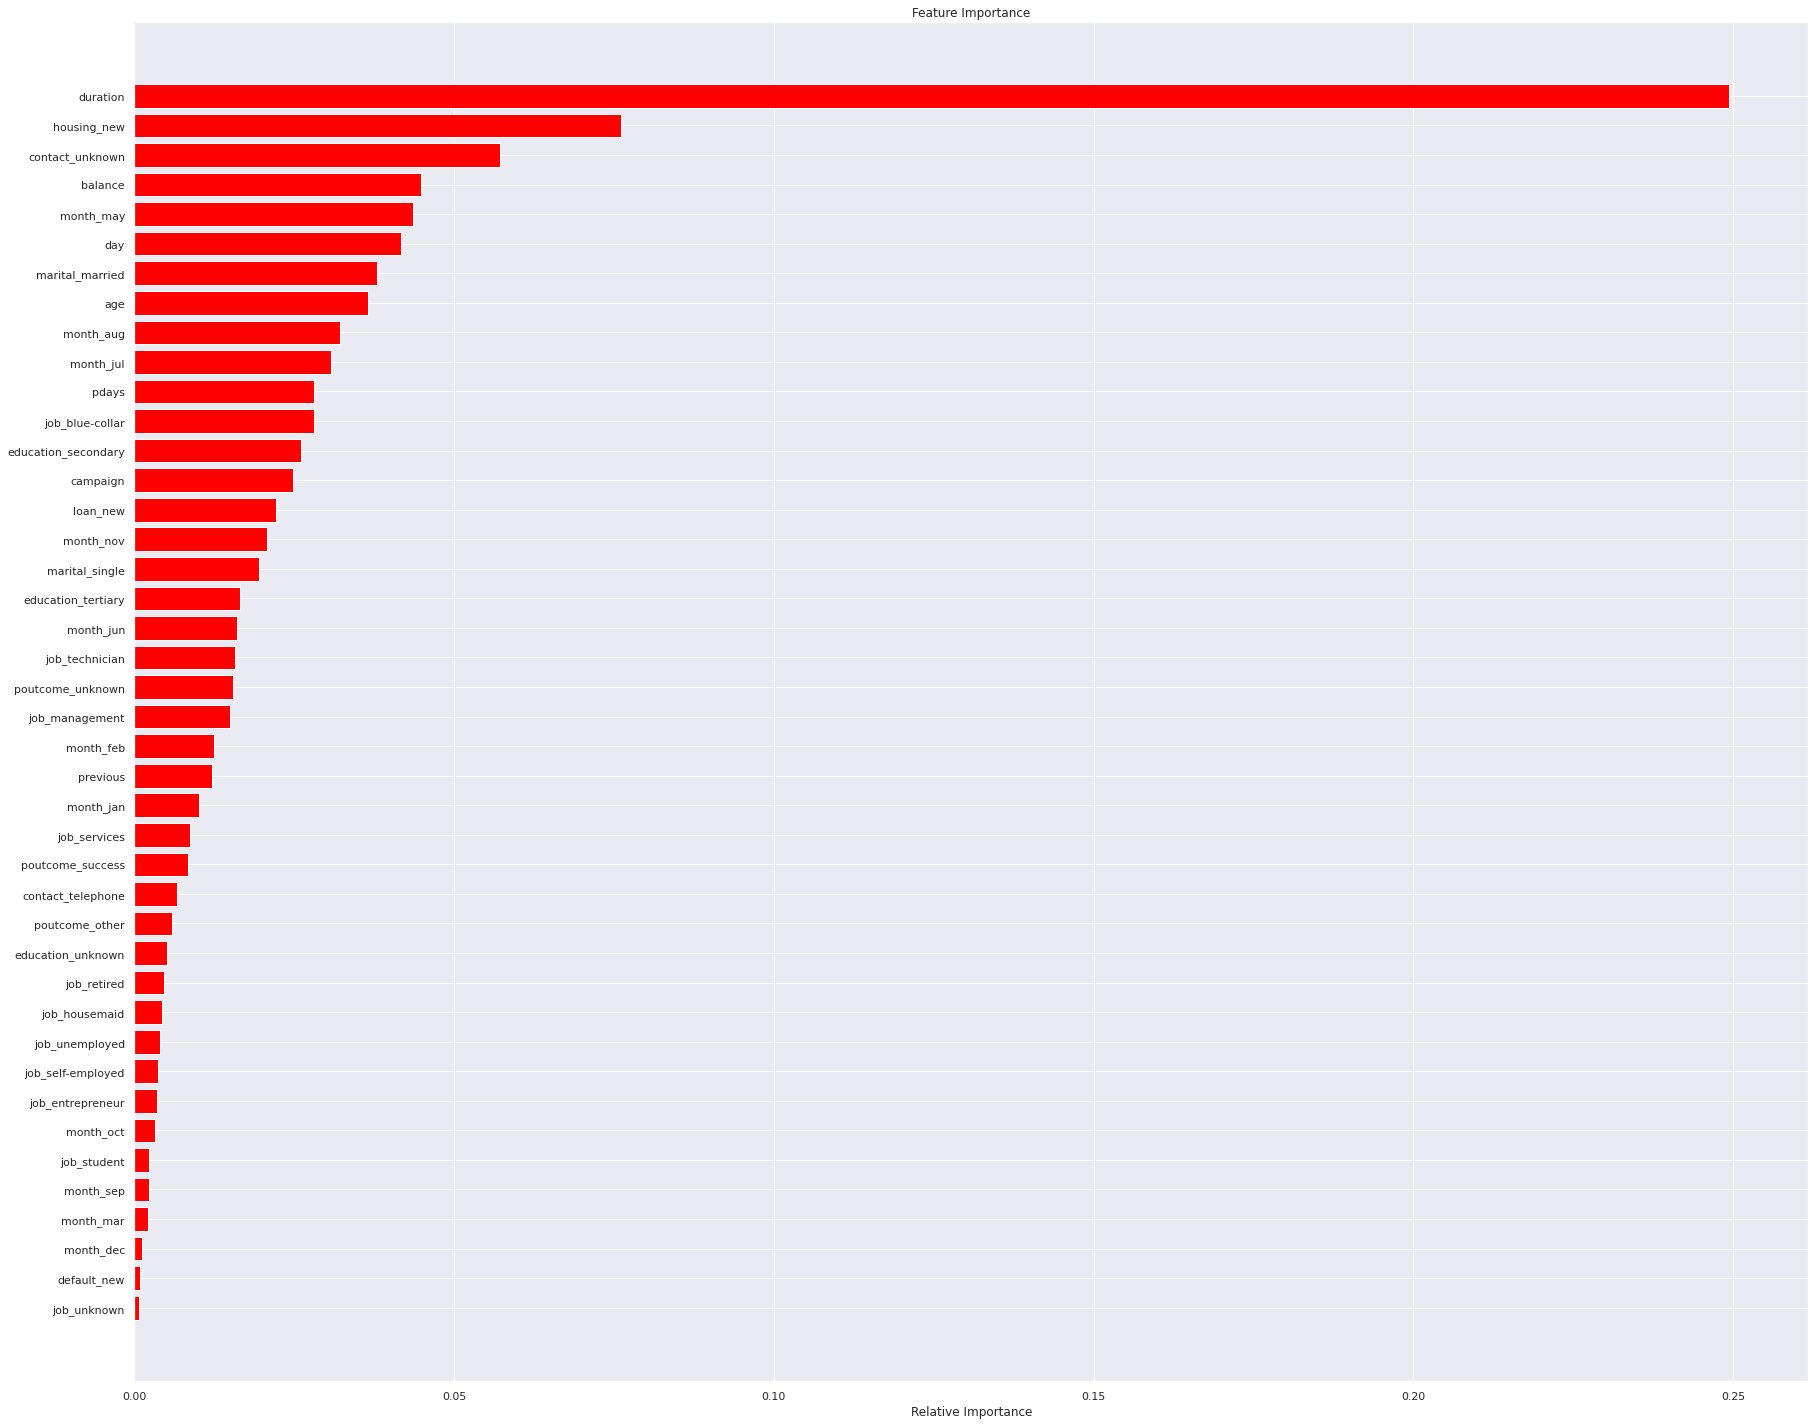

In [39]:
plt.figure(figsize=(30,25))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

clf.fit(X_train_sm, y_train_sm)
modelprediction = clf.predict(X_test)
model_accuracy = accuracy_score(y_test, modelprediction)

print("Training accuracy Score    : ",clf.score(X_train_sm, y_train_sm))
print("Testing accuracy Score : ",model_accuracy )
print(classification_report(modelprediction,y_test))

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, modelprediction)
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("")
ax.set_yticklabels(['Refused T. Deposits', 'Accepted T. Deposits'], fontsize=16, rotation=360)
plt.show()

ROC AOC Curve for Gradient Boosting Classifier

In [ ]:
grb_probability = clf.predict_proba(X_test)[:,1]

In [ ]:
roc_socre=roc_auc_score(y_test, grb_probability)
roc_socre

In [ ]:
from sklearn.metrics import roc_curve
gb_fpr, gb_tpr, _ = roc_curve(y_test, grb_probability)

plt.title('Gradient Boosting Classifier ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(gb_fpr,gb_tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

# **K Neighbors Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model_KNN = KNeighborsClassifier()

model_KNN.fit(X_train_sm, y_train_sm)
modelprediction = model_KNN.predict(X_test)
model_accuracy = accuracy_score(y_test, modelprediction)

print("Training accuracy Score    : ",model_KNN.score(X_train_sm, y_train_sm))
print("Validation accuracy Score : ",model_accuracy )
print(classification_report(modelprediction,y_test))

In [ ]:
model_KNN_probability = model_KNN.predict_proba(X_test)[:,1]

In [ ]:
roc_socre=roc_auc_score(y_test, model_KNN_probability)
roc_socre

In [ ]:
from sklearn.metrics import roc_curve
KNN_fpr, KNN_tpr, _ = roc_curve(y_test, model_KNN_probability)

plt.title('K Neighbors Classifier ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(KNN_fpr,KNN_tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

# XGB Classifier

In [ ]:
#takes huge amount of time to execute
import xgboost as xgb

xgboost_clf = xgb.XGBClassifier()

xgboost_clf.fit(X_train_sm, y_train_sm)
xgb_prediction = xgboost_clf.predict(X_test)
xgb_accuracy = accuracy_score(y_test,xgb_prediction)

print("Training accuracy Score    : ",xgboost_clf.score(X_train_sm, y_train_sm))
print("Testing accuracy Score : ",xgb_accuracy )
print(classification_report(xgb_prediction,y_test))

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test,xgb_prediction)
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("")
ax.set_yticklabels(['Refused T. Deposits', 'Accepted T. Deposits'], fontsize=16, rotation=360)
plt.show()

ROC AOC Curve for XGB Classifier

In [ ]:
Xgb_probability = xgboost_clf.predict_proba(X_test)[:,1]

In [ ]:
roc_socre=roc_auc_score(y_test, Xgb_probability)
roc_socre

In [ ]:
from sklearn.metrics import roc_curve
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, Xgb_probability)

plt.title('XG Boost Classifier ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(xgb_fpr,xgb_tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

Important Feature for XG Boost Classifier

In [ ]:
xgboost_clf.feature_importances_

In [ ]:
features = X.columns
importances = xgboost_clf.feature_importances_
indices = np.argsort(importances)

In [ ]:
plt.figure(figsize=(30,25))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
#roc_auc_score for different classifiers
from sklearn.metrics import roc_auc_score

print('Random Forest Classifier Score: ', roc_auc_score(y_test, rf_clf_probability))
print('Gradient Boosting Classifier Score: ', roc_auc_score(y_test, grb_probability))
print('XGB Classifier: ', roc_auc_score(y_test, Xgb_probability))

In [ ]:
#roc curves
def graph_roc_curve_multiple(rfc_fpr, rfc_tpr, gb_fpr, gb_tpr, xgb_fpr, xgb_tpr):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve \n Top 3 Classifiers', fontsize=18)
    plt.plot(rfc_fpr, rfc_tpr, label='Random Forest Classifier (Score = 91.66%)')
    plt.plot(gb_fpr, gb_tpr, label='Gradient Boosting  Classifier (Score = 87.61%)')
    plt.plot(xgb_fpr, xgb_tpr, label='XGB Classifier (Score = 90.29%)')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(rfc_fpr, rfc_tpr, gb_fpr, gb_tpr, xgb_fpr, xgb_tpr)
plt.show()

Naive Byes Classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train_sm,y_train_sm)

NB_prediction = naiveByes_clf.predict(X_test)
NB_accuracy = accuracy_score(y_test,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train_sm,y_train_sm))
print("Testing accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_test))

ROC AOC Curve for Naive Byes Classifier



In [ ]:
naiveByes_clf_probability = naiveByes_clf.predict_proba(X_test)[:,1]



In [ ]:
roc_socre=roc_auc_score(y_test, naiveByes_clf_probability)
roc_socre

In [ ]:
from sklearn.metrics import roc_curve
na_fpr, na_tpr, _ = roc_curve(y_test, naiveByes_clf_probability)

plt.title('Naive Bayes Classifier ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(na_fpr,na_tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()